# Ejercicio 1: Estimación del valor del número Pi. #

En este ejercicio calcularemos el valor del número Pi por medio de la comparación de las áreas
de un cuadrado de lado L=2 y el área de un círculo inscrito de radio r=1. ¿Cómo funciona este método?
Dejaremos caer puntos (muchos) aleatoriamente y uniformemente sobre la figura. Contaremos los
puntos que caen dentro del círculo y los que caen dentro del cuadrado completo. La razón entre ambos
números corresponde a la razón entre las áreas, pues:

Área círculo/Área cuadrado = pi * r^2 / L * L = pi * r^2 / (2r) * (2r) =pi * r^2 / 4r^2 (dado que L = 2r)
Luego, podemos ver que:
Área círculo / Área cuadrado = pi / 4
En este caso, las áreas de las figuras se aproximan por el número de puntos que caen dentro de
las respectivas figuras, por lo que podemos despejar el valor de pi tal que:
Pi = 4 * N° puntos dentro del círculo / N° puntos dentro del cuadrado.

Repita el experimento utilizando 1000 puntos por cada realización del experimento. Primero,
repita el experimento 100 veces, realice un histograma de los 100 valores estimados de pi y obtenga su
valor de pi como el promedio de los resultados de los experimentos; además, reporte un intervalo de
confianza de 95% para la estimación de pi. Esto último se realiza sabiendo que el 95% corresponde a ±
1.96*sigma, donde sigma es la desviación estándar. Posteriormente, repita el experimento 50.000 veces,
realice un histograma de sus resultados y estime el valor de pi y entregue un intervalo de confianza del
95 %. Marque en sus histogramas los valores promedio con una linea vertical continua y el ±95 % con
una linea vertical entrecortada (utilice el comando vlines de Pyplot) para ambos casos. ¿Qué puede decir
de la distribución de valores obtenidos al repetir el experimento más veces? ¿Tiene sentido el valor del
intervalo de confianza con el valor real de pi?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
L = 2
r= 1

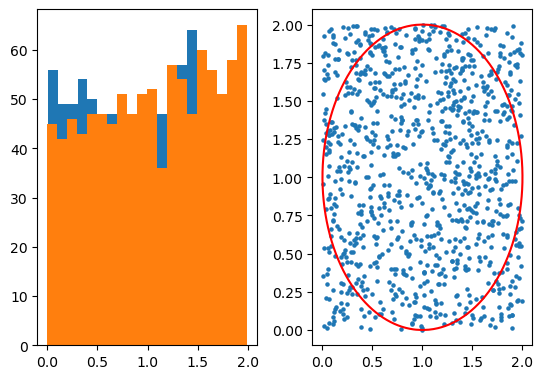

In [92]:
#muestra aleatoria de puntos para eje x
#px = 2 * np.random.random_sample(1000)
px=np.random.uniform(0,2,1000)
#muestra aleatoria de puntos para eje y
#py = 2 * np.random.random_sample(1000)
py=np.random.uniform(0,2,1000)
f,ax = plt.subplots(1,2,dpi=100,sharex='col',sharey=False)
f.subplots_adjust(hspace=0,wspace=0.25,right=0.95, bottom=0.1, top = 0.94)

ax[0].hist(px,bins=20)
ax[0].hist(py,bins=20)

ax[1].scatter(px,py,s=5)
#circulo
z=np.linspace(2,0,1000)
y=np.linspace(0,2,1000)
a = np.sqrt(1-(y-1)**2) + 1
b = -np.sqrt(1-(y-1)**2) + 1
x = np.append(a,b)
y = np.append(y,z)
ax[1].plot(x,y,c='r')

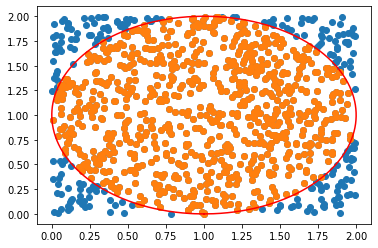

In [111]:
#contar puntos
mask = (px - 1)**2 + (py-1)**2 <= 1
plt.scatter(px,py)
plt.scatter(px[mask],py[mask])
plt.plot(x,y,c='r')

# Ahora podemos contar los puntos dentro y fuera del circulo procedemos a repetir 100 veces el ejercicio #

In [119]:
COUNT = []
for i in range(100):
    px=np.random.uniform(0,2,1000)
    #muestra aleatoria de puntoS
    py=np.random.uniform(0,2,1000)
    mask = (px - 1)**2 + (py-1)**2 <= 1
    #Pi = 4 * N° puntos dentro del círculo / N° puntos dentro del cuadrado.
    COUNT += [4 * (len(py[mask]) / len(py))] #lo que importa realmente es el numero de pts en el circ
    # el cuadrado tendra siempre la misma cantidad de pts

3.14268

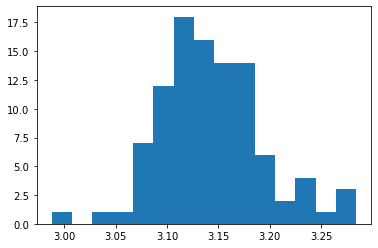

In [123]:
plt.hist(COUNT,bins=15)
np.mean(COUNT) 

reporte un intervalo de confianza de 95% para la estimación de pi. Esto último se realiza sabiendo que el 95% corresponde a ± 1.96*sigma, donde sigma es la desviación estándar. Posteriormente, repita el experimento 50.000 veces,realice un histograma de sus resultados y estime el valor de pi y entregue un intervalo de confianza del
95 %. Marque en sus histogramas los valores promedio con una linea vertical continua y el ±95 % con
una linea vertical entrecortada (utilice el comando vlines de Pyplot) para ambos casos. ¿Qué puede decir
de la distribución de valores obtenidos al repetir el experimento más veces? ¿Tiene sentido el valor del
intervalo de confianza con el valor real de pi?

In [235]:
#desviacion estandar
sigma = ((COUNT - np.mean(COUNT))**2)/len(COUNT)
s = np.sqrt(sigma.sum())
med = np.median(COUNT)
print(s)
intervalo = np.where((COUNT >= med-(1.96*s))&(COUNT <= med+(1.96*s)))[0]
COUNT = np.array(COUNT)
print(f'{(len(COUNT[intervalo])/len(COUNT))*100}% de datos dentro del intervalo de sigma')


0.052096534827168715
94.946% de datos dentro del intervalo de sigma


In [236]:
sigma.sum()

0.002714048940998403

94.89800000000001% de datos dentro del intervalo de sigma


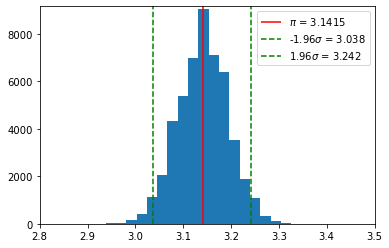

In [251]:
COUNT = []
for i in range(50000):
    px=np.random.uniform(0,2,1000)
    #muestra aleatoria de puntoS
    py=np.random.uniform(0,2,1000)
    mask = (px - 1)**2 + (py-1)**2 <= 1
    #Pi = 4 * N° puntos dentro del círculo / N° puntos dentro del cuadrado.
    COUNT += [4 * (len(py[mask]) / len(py))] #lo que importa realmente es el numero de pts en el circ
    # el cuadrado tendra siempre la misma cantidad de pts
    
a = plt.hist(COUNT,bins=20)
plt.vlines(np.mean(COUNT),0,max(a[0])+100,color='r', label=r'$\pi$ = %.4f'%np.mean(COUNT))

sigma = ((COUNT - np.mean(COUNT))**2)/len(COUNT)
s = np.sqrt(sigma.sum())
med = np.median(COUNT)
intervalo = np.where((COUNT >= med-(1.96*s))&(COUNT <= med+(1.96*s)))[0]
COUNT = np.array(COUNT)
print(f'{(len(COUNT[intervalo])/len(COUNT))*100}% de datos dentro del intervalo de sigma')

plt.vlines(med-(1.96*s),0,max(a[0])+100,color='g', linestyle='--',label=r'-1.96$\sigma$ = %.3f'%(med-(1.96*s)))
plt.vlines(med+(1.96*s),0,max(a[0])+100,color='g', linestyle='--',label=r'1.96$\sigma$ = %.3f'%(med+(1.96*s)))

plt.ylim(0,max(a[0])+100)
plt.xlim(2.8,3.5)
plt.legend()

## ¿Qué puede decir de la distribución de valores obtenidos al repetir el experimento más veces?  ##
### R: Se observa un cambio en la precisión del tercer orden, con 100 repeticiones se obtiene pi=3.142 y al repetir para 50.000 se obtiene un valor de pi = ~3.1415, mejora la precision de la estimación al aumentar las repeticiones###


## ¿Tiene sentido el valor del intervalo de confianza con el valor real de pi? ##
### R: Pareciera ser necesario acotar aun más el intervalo de confianza, quizas sea mejor restringir la confianza a 1 sigma  para tener certeza de la precisión en al menos el primer orden ###